# **1. IMPORT LIBRARY**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy import stats
import numpy as np
import statistics
# https://geospasialis.com/k-means-clustering/

# **2. DATA UNDERSTANDING**

## Pencarian dan Pengumpulan Data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dt = pd.read_csv('/content/drive/MyDrive/RuangGuru/marketing_campaign.csv')
# https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/data

In [ ]:
dt.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Eksplorasi Data

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
dt_baru = dt[['ID','Year_Birth','Education','Marital_Status','Income','Recency']]
dt_baru['ID'] = dt_baru['ID'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dt_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2240 non-null   object 
 1   Year_Birth      2240 non-null   int64  
 2   Education       2240 non-null   object 
 3   Marital_Status  2240 non-null   object 
 4   Income          2216 non-null   float64
 5   Recency         2240 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 105.1+ KB


In [ ]:
dt_baru.head()

,ID,Year_Birth,Education,Marital_Status,Income,Recency
0,5524,1957,Graduation,Single,58138.0,58
1,2174,1954,Graduation,Single,46344.0,38
2,4141,1965,Graduation,Together,71613.0,26
3,6182,1984,Graduation,Together,26646.0,26
4,5324,1981,PhD,Married,58293.0,94


## Analisis Deskriptif

In [ ]:
dt_baru.describe()

,Year_Birth,Income,Recency
count,2240.000000,2216.000000,2240.000000
mean,1968.805804,52247.251354,49.109375
std,11.984069,25173.076661,28.962453
min,1893.000000,1730.000000,0.000000
25%,1959.000000,35303.000000,24.000000
50%,1970.000000,51381.500000,49.000000
75%,1977.000000,68522.000000,74.000000
max,1996.000000,666666.000000,99.000000


## Verifikasi Kualitas Data

### Cek missing value

In [ ]:
dt_baru.isna().sum()

ID                 0
Year_Birth         0
Education          0
Marital_Status     0
Income            24
Recency            0
dtype: int64

### Cek data outliers

Variabel : Year_Birth

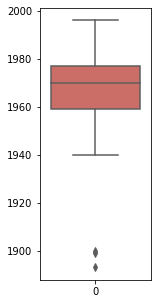

In [ ]:
fig, ax = plt.subplots(figsize=(2,5))
sns.boxplot(data=dt_baru['Year_Birth'], palette=('#db5f57', '#dbc257', '#91db57', '#57d3db'))

Variabel : Income

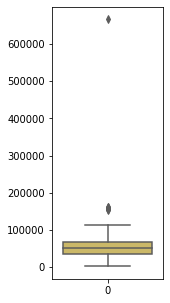

In [ ]:
fig, ax = plt.subplots(figsize=(2,5))
sns.boxplot(data=dt_baru['Income'], palette=('#dbc257', '#91db57', '#57d3db'))

Variabel : Recency

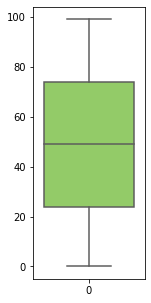

In [ ]:
fig, ax = plt.subplots(figsize=(2,5))
sns.boxplot(data=dt_baru['Recency'], palette=('#91db57', '#57d3db'))

# **3. DATA PREPARATION**

## Menghapus missing value

In [ ]:
dt_baru = dt_baru.dropna()

In [ ]:
dt_baru.isna().sum()

ID                0
Year_Birth        0
Education         0
Marital_Status    0
Income            0
Recency           0
dtype: int64

## Mengatasi outliers
Pada analisis box plot di atas, diketahui bahwa terdapat data outliers pada variabel Year_Birth dan Income

Variabel : Year_Birth

In [ ]:
data_year =  dt_baru[['Year_Birth']]

data_year_zscore = data_year[(np.abs(stats.zscore(data_year)) < 3).all(axis=1)]

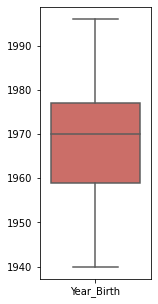

In [ ]:
fig, ax = plt.subplots(figsize=(2,5))
sns.boxplot(data=data_year_zscore, palette=('#db5f57', '#dbc257', '#91db57', '#57d3db'))

Variabel : Income

In [ ]:
data_income =  dt_baru[['Income']]

data_income_zscore = data_income[(np.abs(stats.zscore(data_income)) < 3).all(axis=1)]

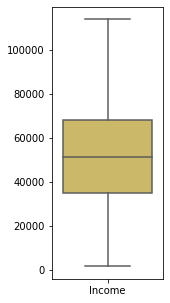

In [ ]:
fig, ax = plt.subplots(figsize=(2,5))
sns.boxplot(data=data_income_zscore, palette=('#dbc257', '#91db57', '#57d3db'))

## Menggabungkan data bersih ke dalam data asli

In [ ]:
dt_fix = pd.concat([dt_baru[['ID','Education','Marital_Status','Recency']], data_year_zscore,data_income_zscore], axis=1)

In [ ]:
dt_fix.head()

,ID,Education,Marital_Status,Recency,Year_Birth,Income
0,5524,Graduation,Single,58,1957.0,58138.0
1,2174,Graduation,Single,38,1954.0,46344.0
2,4141,Graduation,Together,26,1965.0,71613.0
3,6182,Graduation,Together,26,1984.0,26646.0
4,5324,PhD,Married,94,1981.0,58293.0


In [ ]:
dt_fix.isna().sum()

ID                0
Education         0
Marital_Status    0
Recency           0
Year_Birth        3
Income            8
dtype: int64

In [ ]:
dt_fix = dt_fix.dropna()

In [ ]:
dt_fix['Year_Birth'] = dt_fix['Year_Birth'].astype(int)
dt_fix['Income'] = dt_fix['Income'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dt_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2205 non-null   object
 1   Education       2205 non-null   object
 2   Marital_Status  2205 non-null   object
 3   Recency         2205 non-null   int64 
 4   Year_Birth      2205 non-null   int64 
 5   Income          2205 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 120.6+ KB


In [ ]:
dt_fix.head()

,ID,Education,Marital_Status,Recency,Year_Birth,Income
0,5524,Graduation,Single,58,1957,58138
1,2174,Graduation,Single,38,1954,46344
2,4141,Graduation,Together,26,1965,71613
3,6182,Graduation,Together,26,1984,26646
4,5324,PhD,Married,94,1981,58293


# **4. MODELLING**

## Persiapan modeling

In [ ]:
dt_train = dt_fix.copy()

In [ ]:
dt_train =  dt_train.drop(columns=['ID','Year_Birth'])
dt_trained = dt_train.copy()

In [ ]:
encoder = OneHotEncoder()
encoder.fit(dt_trained.select_dtypes(include="object"))
dt_train_os = pd.DataFrame(encoder.transform(dt_trained.select_dtypes(include="object")).toarray(),columns=encoder.get_feature_names_out())
dt_train_temp = pd.concat([dt_trained.select_dtypes(exclude="object"), dt_train_os],axis=1)

scaler = StandardScaler()
scaler.fit(dt_train_temp)
dt_trained = pd.DataFrame(scaler.transform(dt_train_temp),columns=dt_train_temp.columns)

In [ ]:
dt_trained = dt_trained.drop(dt_trained.tail(33).index)
dt_trained = dt_trained.fillna(0)

## Evaluasi dengan Elbow Method

<function matplotlib.pyplot.show>

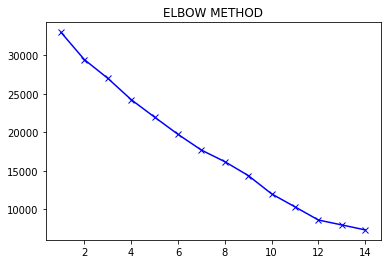

In [ ]:
distortions = []
wcss = []
K = range(1,15)

for count in K :
    model = KMeans(count)
    model.fit(dt_trained)
    wcss_iters = model.inertia_
    wcss.append(wcss_iters)

plt.plot(K,wcss,'bx-')
plt.title("ELBOW METHOD")
plt.show
# best K = 10;

## Modeling(K-Means)

In [ ]:
K = 10
result_10 = KMeans(n_clusters=K, random_state=11)

result_10.fit(dt_trained)

KMeans(n_clusters=10, random_state=11)

In [ ]:
K = 5
result_5 = KMeans(n_clusters=K, random_state=11)

result_5.fit(dt_trained)

KMeans(n_clusters=5, random_state=11)

In [ ]:
dt_train = dt_train.assign(
    hasil_kluster_10=result_10.predict(dt_trained),
    hasil_kluster_5=result_5.predict(dt_trained),
)

# **5. DEPLOYMENT**

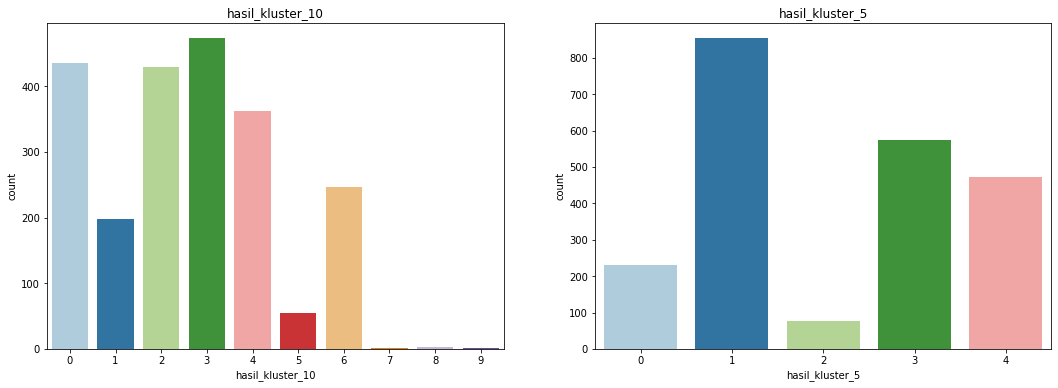

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(18, 6))
for ax, preds in zip(axis, ["hasil_kluster_10", "hasil_kluster_5"]):
    sns.countplot(x=preds, data=dt_train, ax=ax, palette="Paired")
    ax.set_title(preds)

In [ ]:
dt_train = dt_train.drop(columns=['hasil_kluster_10'])

In [ ]:
C_1 = dt_train[dt_train['hasil_kluster_5'] == 0]
C_2 = dt_train[dt_train['hasil_kluster_5'] == 1]
C_3 = dt_train[dt_train['hasil_kluster_5'] == 2]
C_4 = dt_train[dt_train['hasil_kluster_5'] == 3]
C_5 = dt_train[dt_train['hasil_kluster_5'] == 4]

In [ ]:
dt_train

,Education,Marital_Status,Recency,Income,hasil_kluster_5
0,Graduation,Single,58,58138,4
1,Graduation,Single,38,46344,4
2,Graduation,Together,26,71613,3
3,Graduation,Together,26,26646,3
4,PhD,Married,94,58293,1
...,...,...,...,...,...
2235,Graduation,Married,46,61223,1
2236,PhD,Together,56,64014,3
2237,Graduation,Divorced,91,56981,0
2238,Master,Together,8,69245,3


## Cluster ke-1

In [ ]:
print(C_1['Education'].unique())
print(C_1['Marital_Status'].unique())

['Graduation' 'Master' 'PhD' 'Basic' '2n Cycle']
['Divorced']


In [ ]:
C_1.describe()

,Recency,Income,hasil_kluster_5
count,230.000000,230.000000,230.0
mean,49.134783,52465.117391,0.0
std,28.589767,20227.709969,0.0
min,0.000000,1730.000000,0.0
25%,25.250000,36967.000000,0.0
50%,51.000000,52683.000000,0.0
75%,74.000000,68625.750000,0.0
max,99.000000,102692.000000,0.0


## Cluster ke-2

In [ ]:
print(C_2['Education'].unique())
print(C_2['Marital_Status'].unique())

['PhD' 'Basic' 'Graduation' 'Master' '2n Cycle']
['Married']


In [ ]:
C_2.describe()

,Recency,Income,hasil_kluster_5
count,854.000000,854.00000,854.0
mean,48.241218,51350.51171,1.0
std,29.452016,20532.40049,0.0
min,0.000000,2447.00000,1.0
25%,23.000000,35243.75000,1.0
50%,48.000000,51650.50000,1.0
75%,73.000000,67465.25000,1.0
max,99.000000,96547.00000,1.0


## Cluster ke-3

In [ ]:
print(C_3['Education'].unique())
print(C_3['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' '2n Cycle' 'Basic']
['Widow']


In [ ]:
C_3.describe()

,Recency,Income,hasil_kluster_5
count,76.000000,76.000000,76.0
mean,48.802632,56481.552632,2.0
std,28.806490,16837.952451,0.0
min,0.000000,22123.000000,2.0
25%,27.250000,44892.250000,2.0
50%,48.000000,56551.000000,2.0
75%,73.750000,70321.750000,2.0
max,99.000000,85620.000000,2.0


## Cluster ke-4

In [ ]:
print(C_4['Education'].unique())
print(C_4['Marital_Status'].unique())

['Graduation' 'Master' 'PhD' '2n Cycle' 'Basic']
['Together' 'Alone' 'YOLO']


In [ ]:
C_4.describe()

,Recency,Income,hasil_kluster_5
count,573.000000,573.000000,573.0
mean,49.914485,51501.654450,3.0
std,28.666115,20297.935141,0.0
min,0.000000,5648.000000,3.0
25%,26.000000,34728.000000,3.0
50%,51.000000,50943.000000,3.0
75%,75.000000,67911.000000,3.0
max,99.000000,105471.000000,3.0


## Cluster ke-5

In [ ]:
print(C_5['Education'].unique())
print(C_5['Marital_Status'].unique())

['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
['Single' 'Absurd']


In [ ]:
C_5.describe()

,Recency,Income,hasil_kluster_5
count,472.000000,472.000000,472.0
mean,49.271186,51066.438559,4.0
std,28.572524,22249.927119,0.0
min,0.000000,3502.000000,4.0
25%,26.000000,33627.500000,4.0
50%,50.500000,48911.000000,4.0
75%,74.000000,69264.000000,4.0
max,99.000000,113734.000000,4.0
